## 🔰 Day 2 - Assignment (2024.11.26)

In [23]:
# 필요한 라이브러리 호출
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid, BCELoss, Module
import torch.nn.functional as F
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# 데이터 로드
df = pd.read_csv('data/pima-indians-diabetes.data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---

### 1️⃣ correlation, heatmap

In [ ]:
# 상관관계 표
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


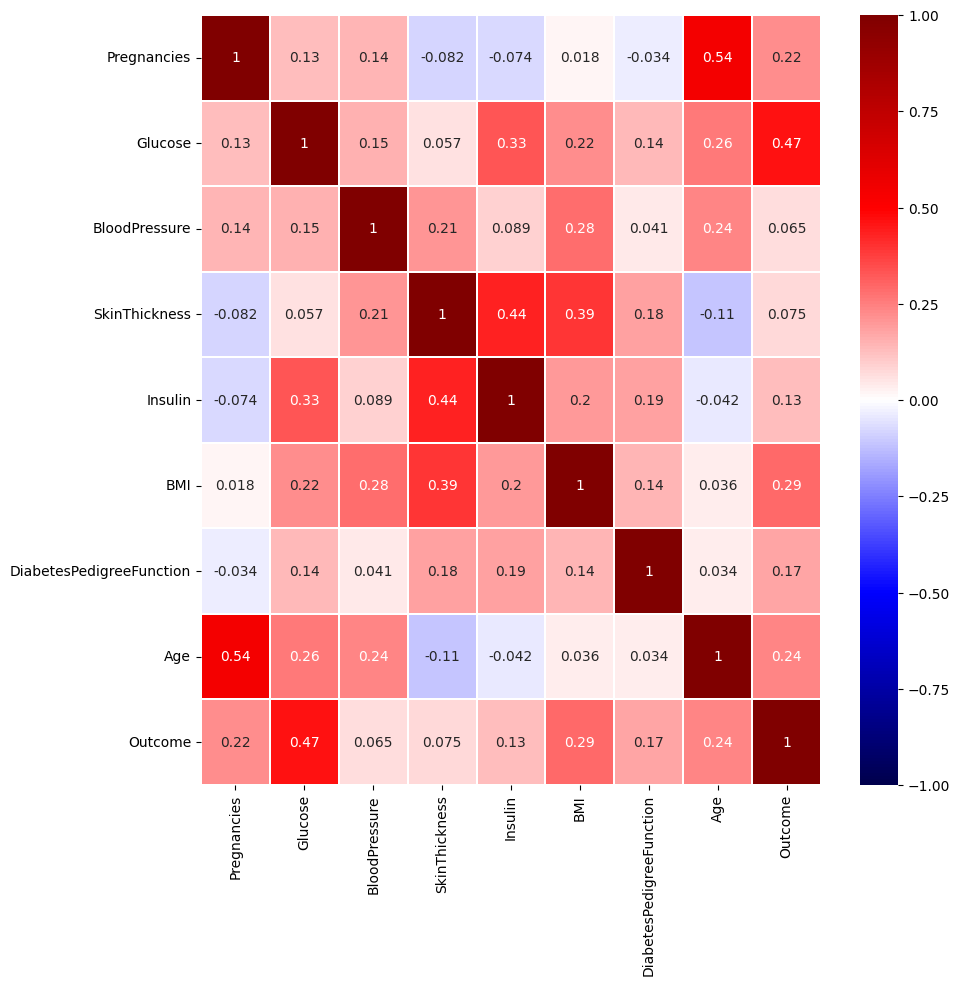

In [ ]:
# Heatmap 그리기
plt.figure( figsize=(10, 10) )
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap="seismic")
plt.show()

---

### 2️⃣ Normalization

In [29]:
# dataframe화
df = pd.DataFrame(df)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
x_data = df.iloc[:, :-1]
y_data = df.iloc[:, [-1]]

In [31]:
# MinMaxScaler 적용
scaleF = MinMaxScaler()
x_dataN  =scaleF.fit_transform(x_data)

In [32]:
# x_data 확인 (정규화 O)
x_dataN

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
# label column도 MinMaxScaler 적용
scaleL = MinMaxScaler()
y_dataN = scaleL.fit_transform(y_data)

In [36]:
# y_data 확인 (정규화 O)
y_dataN

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

---

### 3️⃣ Training

In [43]:
# tensor node 생성
x = torch.FloatTensor(x_dataN)
y = torch.FloatTensor(y_dataN)

w = torch.empty( [8, 1], requires_grad=True) # [특성 데이터 수, 라벨 수]
b = torch.empty( [1], requires_grad=True) # [라벨 수]

torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)

tensor([0.9788], requires_grad=True)

In [44]:
# cost function 정의
def cost():
    hx = torch.matmul(x, w) + b
    c = torch.mean((hx - y) ** 2)
    return c

In [57]:
# 학습
model = Sequential()
model.add_module('nn', Linear(8, 1))
loss_fn = MSELoss()
optimizer = Adam(model.parameters(), lr=0.1)

for epoch in range(2000):
    optimizer.zero_grad()
    hx = model(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print(f'{epoch} - cost : {cost.item()}')

0 - cost : 0.22201459109783173
1 - cost : 0.32768335938453674
2 - cost : 0.22680027782917023
3 - cost : 0.23847556114196777
4 - cost : 0.27215924859046936
5 - cost : 0.25272947549819946
6 - cost : 0.21834780275821686
7 - cost : 0.20758689939975739
8 - cost : 0.22127600014209747
9 - cost : 0.23187343776226044
10 - cost : 0.22379595041275024
11 - cost : 0.20660682022571564
12 - cost : 0.19658933579921722
13 - cost : 0.19949422776699066
14 - cost : 0.20684845745563507
15 - cost : 0.20738466084003448
16 - cost : 0.19956175982952118
17 - cost : 0.1907508820295334
18 - cost : 0.18800592422485352
19 - cost : 0.19116055965423584
20 - cost : 0.1940879225730896
21 - cost : 0.19210432469844818
22 - cost : 0.18660658597946167
23 - cost : 0.18245531618595123
24 - cost : 0.18237175047397614
25 - cost : 0.1844109296798706
26 - cost : 0.18473096191883087
27 - cost : 0.18206743896007538
28 - cost : 0.17866377532482147
29 - cost : 0.17724759876728058
30 - cost : 0.17796672880649567
31 - cost : 0.1786014

In [58]:
# 학습된 weight 값 확인
model[0].weight

Parameter containing:
tensor([[ 0.3501,  1.1781, -0.2845,  0.0153, -0.1527,  0.8887,  0.3448,  0.1573]],
       requires_grad=True)

In [59]:
# 학습된 bias 값 확인
model[0].bias

Parameter containing:
tensor([-0.7874], requires_grad=True)

---

### 4️⃣ Predict Diabete of row 0

In [72]:
# 예측해보기 : 0번째 행
list = df.iloc[0, 0:8].to_numpy()
model(torch.FloatTensor([list]))

tensor([[193.6709]], grad_fn=<AddmmBackward>)

---

### 5️⃣ accuracy, f1 score, confsion matrix

In [73]:
pred = (hx > 0.5).float()

In [71]:
print(f'accuracy : {accuracy_score(y.numpy(), pred.numpy())}')
print(f'f1 score : {f1_score(y.numpy(), pred.numpy())}')
print(f'confusion matrix : {confusion_matrix(y.numpy(), pred.numpy())}')

accuracy : 0.7838541666666666
f1 score : 0.6512605042016807
confusion matrix : [[447  53]
 [113 155]]


---